In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


# set seed for reproducibility
np.random.seed(0)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/hotel-booking/hotel_booking.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
5627,Resort Hotel,0,354,2016,May,19,6,2,5,2,...,Transient,37.56,0,0,Check-Out,2016-05-13,Bob Park,Bob.Park@hotmail.com,792-606-2902,************1699
119322,City Hotel,0,142,2017,August,35,31,0,3,2,...,Transient,86.10,0,0,Check-Out,2017-09-03,Holly Werner,Holly.Werner@outlook.com,442-500-6336,************5008
75310,City Hotel,1,304,2015,August,34,17,1,1,2,...,Transient-Party,62.00,0,0,Canceled,2015-07-02,Grace Fuller,Fuller.Grace@mail.com,103-386-7905,************2739
90032,City Hotel,0,5,2016,May,22,28,2,2,2,...,Transient,133.10,0,1,Check-Out,2016-06-01,Laura Baker,Laura.B@verizon.com,860-560-9489,************8330
75368,City Hotel,1,313,2015,August,35,26,0,2,2,...,Transient-Party,62.00,0,0,Canceled,2015-07-02,Brandon Morgan,BrandonMorgan@outlook.com,417-205-2074,************4679


In [4]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [5]:
# data cleaning
# handeling missing value
missing_values_count = df.isnull().sum()
missing_values_count[0:]

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
(total_missing/total_cells) * 100

3.01125629356637

In [7]:
# remove all the rows that contain a missing value
df=df.dropna()

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
#Filling in missing values automatically
# replace all NA's with 0
df.fillna(0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


In [10]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
df.fillna(method = 'bfill', axis=0).fillna(0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


Text(0.5, 1.0, 'Scaled data')

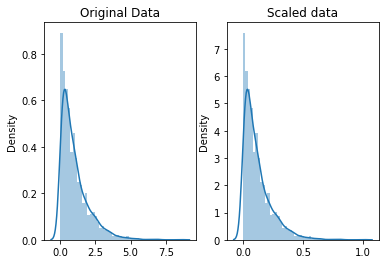

In [11]:
# scaling, Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to 
#change your observations so that they can be described as a normal distribution.

# generate 2000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 2000)
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Normalized data')

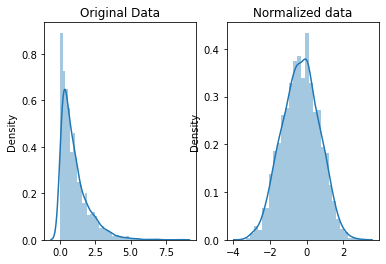

In [12]:
# normalization
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

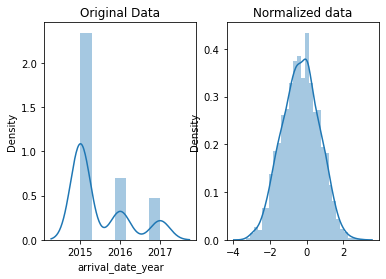

In [13]:
# normalize the  data with boxcox
normalized_arrival_date_year = stats.boxcox(df['arrival_date_year'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['arrival_date_year'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")